In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading Data - All audio files from GTZAN

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Datasets/Audio  Classification/GTZAN'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Datasets/Audio  Classification/GTZAN/bextract_single.mf
/content/drive/MyDrive/Datasets/Audio  Classification/GTZAN/bl.mf
/content/drive/MyDrive/Datasets/Audio  Classification/GTZAN/cl.mf
/content/drive/MyDrive/Datasets/Audio  Classification/GTZAN/co.mf
/content/drive/MyDrive/Datasets/Audio  Classification/GTZAN/di.mf
/content/drive/MyDrive/Datasets/Audio  Classification/GTZAN/hi.mf
/content/drive/MyDrive/Datasets/Audio  Classification/GTZAN/ja.mf
/content/drive/MyDrive/Datasets/Audio  Classification/GTZAN/input.mf
/content/drive/MyDrive/Datasets/Audio  Classification/GTZAN/me.mf
/content/drive/MyDrive/Datasets/Audio  Classification/GTZAN/po.mf
/content/drive/MyDrive/Datasets/Audio  Classification/GTZAN/re.mf
/content/drive/MyDrive/Datasets/Audio  Classification/GTZAN/ro.mf
/content/drive/MyDrive/Datasets/Audio  Classification/GTZAN/data.csv
/content/drive/MyDrive/Datasets/Audio  Classification/GTZAN/blues/blues.00002.wav
/content/drive/MyDrive/Datasets/Audio  Cl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [ ]:
librosa.load(audio_data, sr=45600)

(array([-0.08003321, -0.10589562, -0.09959807, ..., -0.06361606,
        -0.05566827, -0.02777512], dtype=float32), 45600)

Playing a random audio clip from the dataset

In [ ]:
import IPython
IPython.display.Audio(data, rate=sr)

Visualizing the audio in the form of a waveplot

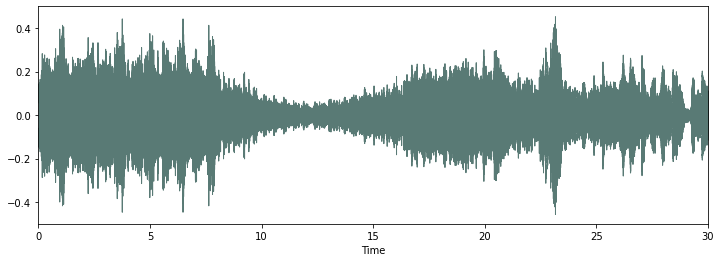

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, color = "#597A75")
plt.show()

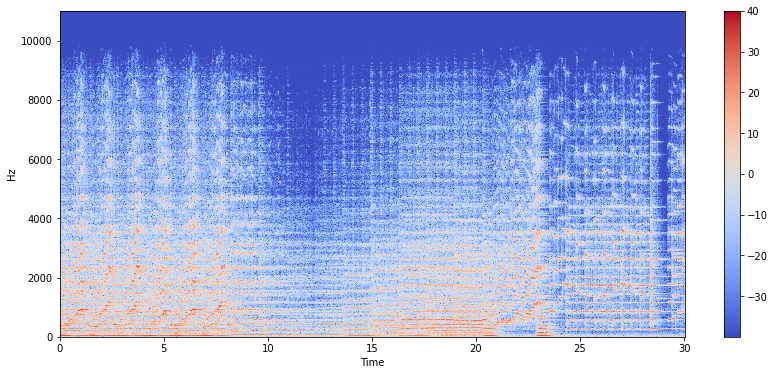

In [ ]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

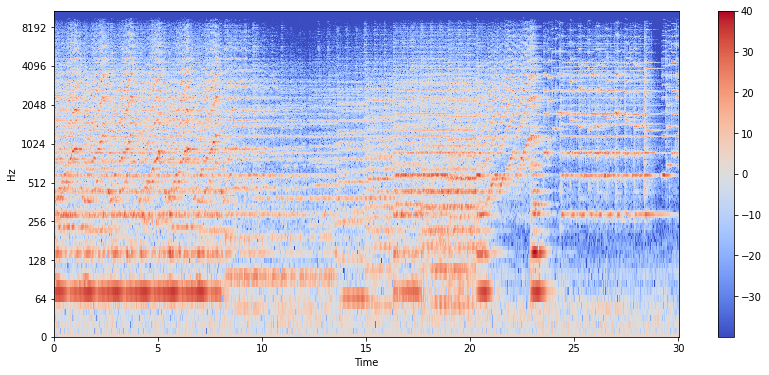

In [ ]:
plt.figure(figsize=(14, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

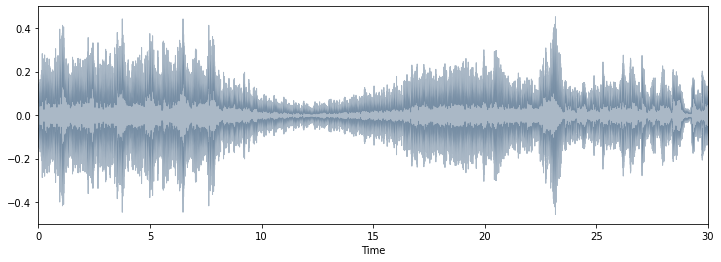

In [ ]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sr, alpha=0.4, color = "#2B4F72")

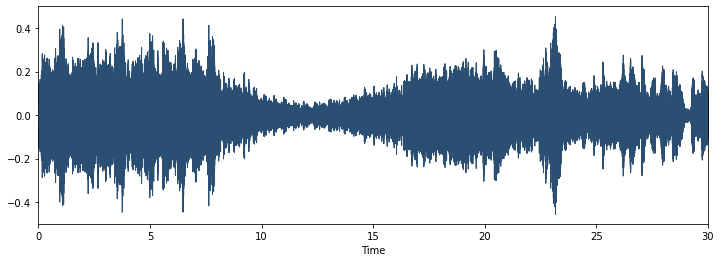

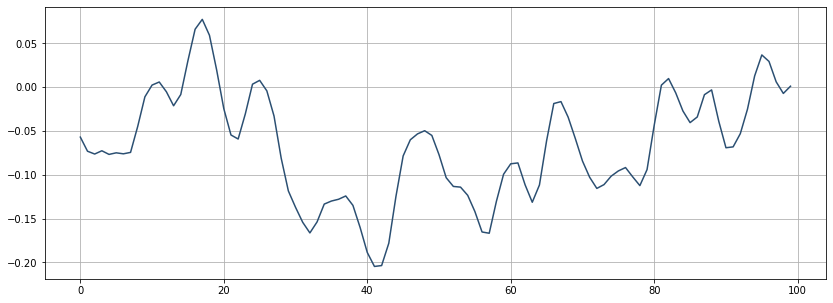

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sr, color="#2B4F72")
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(data[n0:n1], color="#2B4F72")
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
print("The number of zero-crossings is :",sum(zero_crossings))

The number of zero-crossings is : 11


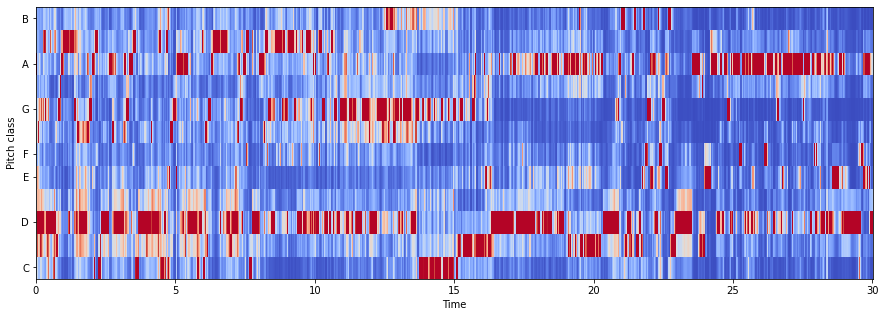

In [ ]:
chromagram = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

In [ ]:
%matplotlib inline
from keras import layers
import keras

In [ ]:
df1 = pd.read_csv('../content/drive/MyDrive/Datasets/data.csv')
df1.head()


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874687,2.916037,21.523726,-8.554704,23.358671,-10.103617,11.903744,-5.560388,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
1,blues.00006.wav,0.291308,0.141796,1459.078483,1388.913312,2795.616429,0.073028,-190.149460,130.296951,-36.344139,33.013054,11.106936,-0.615159,-20.862009,0.270091,-6.489760,-5.517094,-7.840328,-3.125678,-6.593118,-9.942267,-6.537224,-10.064754,-10.912171,-6.972478,-3.449033,-6.495510,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,-13.987036,25.754759,-13.649585,11.629271,-11.780589,9.706443,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,1.754462,14.238345,-4.830883,9.297966,-0.757742,8.149013,-3.196314,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351032,-6.376458,18.618876,-13.697912,15.344631,-12.285267,10.980492,-8.324325,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues


In [ ]:
df1.shape

(1000, 28)

In [ ]:
df1.dtypes

filename               object
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                  object
dtype: object

In [ ]:
df1 = df1.drop(labels='filename',axis=1)

In [ ]:
genre_list = df1.iloc[:, -1]
encoder = LabelEncoder()

In [ ]:
y = encoder.fit_transform(genre_list)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [ ]:
print(df1.iloc[:, :-1])

     chroma_stft      rmse  spectral_centroid  ...    mfcc18     mfcc19    mfcc20
0       0.340983  0.095918        1529.835316  ...  0.293876  -0.287431  0.531573
1       0.291308  0.141796        1459.078483  ... -6.972478  -3.449033 -6.495510
2       0.363603  0.175573        1552.481958  ... -1.815723  -3.433434 -2.226821
3       0.404779  0.141191        1070.119953  ...  0.637982  -0.619690 -3.408233
4       0.349943  0.130225        1784.420446  ... -0.409953  -2.300209  1.219929
..           ...       ...                ...  ...       ...        ...       ...
995     0.389165  0.101979        2629.346944  ...  2.995414  -6.416000  2.251966
996     0.358195  0.054461        1609.442919  ...  0.023643  -2.022034  1.158525
997     0.362349  0.083888        1398.672358  ...  1.558265  -5.043121 -3.585596
998     0.432103  0.081617        2077.190361  ...  3.447425 -12.594178 -2.107002
999     0.416485  0.106913        2471.235787  ... -1.604236 -16.088310 -2.187146

[1000 rows x 26

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(np.array(df1.iloc[:, :-1], dtype = float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from keras.models import Sequential
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=180,
                    batch_size=128)

Epoch 1/180
7/7 [==============================] - 3s 3ms/step - loss: 2.2717 - accuracy: 0.1567
Epoch 2/180
7/7 [==============================] - 0s 2ms/step - loss: 1.9643 - accuracy: 0.3818
Epoch 3/180
7/7 [==============================] - 0s 2ms/step - loss: 1.7177 - accuracy: 0.4402
Epoch 4/180
7/7 [==============================] - 0s 2ms/step - loss: 1.5017 - accuracy: 0.4776
Epoch 5/180
7/7 [==============================] - 0s 2ms/step - loss: 1.3626 - accuracy: 0.5042
Epoch 6/180
7/7 [==============================] - 0s 2ms/step - loss: 1.2318 - accuracy: 0.5937
Epoch 7/180
7/7 [==============================] - 0s 2ms/step - loss: 1.1094 - accuracy: 0.6531
Epoch 8/180
7/7 [==============================] - 0s 2ms/step - loss: 1.0548 - accuracy: 0.6580
Epoch 9/180
7/7 [==============================] - 0s 3ms/step - loss: 0.9701 - accuracy: 0.6867
Epoch 10/180
7/7 [==============================] - 0s 2ms/step - loss: 0.9526 - accuracy: 0.6674
Epoch 11/180
7/7 [===========

In [ ]:
test_loss, test_acc  = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 7ms/step - loss: 1.6314 - accuracy: 0.6850


In [ ]:
print("The test loss is :",test_loss, "\nThe test accuracy is :",test_acc)

The test loss is : 1.6313698291778564 
The test accuracy is : 0.6850000023841858
